In [ ]:
"""This script computes statistics and plots regarding the inter-state connectivity and specialization of the US and EU states."""

In [14]:
import pandas as pd
import datetime

# organizations
df2 = pd.read_csv("../Data/organizations_prepost_2020-01-01.csv")

# partnerships
long_df = pd.read_csv("../Data/innovation_network_prepost_2020-01-01.csv")


In [15]:
# convert to datetime, take only Post-IRA period
long_df['post_date'] = pd.to_datetime(long_df['post_date'])
long_df = long_df[long_df['post_date'] >= datetime.datetime(2022, 7, 1)]

columns = long_df.columns[6:]

columns_= list(columns)
columns_.append('partners')

long_df["partners"] = long_df.apply(lambda x: '-'.join(sorted([x['source'], x['target']])), axis=1)

In [16]:
# get all locations of organizations

list_US = ["US"]
countries_eu = [
    'ES', 'BE', 'AT', 'NL', 'FR', 'IE', 'IT', 'FI', 'DE', 'SE', 'GR',
    'PT', 'LU', 'PL', 'DK', 'SK', 'CZ', 'BG', 'HR', 'HU', 'EE', 'LT',
    'LV', 'CY', 'SI', 'RO', 'MT'
]

df_locations= pd.read_csv("../Data/locations_with_postalcode.csv")

# get all Linkedin_names with headquarter
df_organizations_headquarter_EU = df_locations[(df_locations["country"].isin(countries_eu)) & (df_locations["headquarter"] == 1)]

df_organizations_headquarter_US = df_locations[(df_locations["country"].isin(list_US)) & (df_locations["headquarter"] == 1)]

In [17]:
"""covert the postalCode to states in the US"""
# might need to install: pip install "sqlalchemy-mate==2.0.0.0"
from uszipcode import SearchEngine
search = SearchEngine()
def get_state(zip_code):
    zipcode = search.by_zipcode(zip_code)
    return zipcode.state if zipcode else "Unknown"

#df_organizations_headquarter_US["postalCode"] = pd.to_numeric(df_organizations_headquarter_US["postalCode"], #errors='coerce')
df_organizations_headquarter_US["state"] = df_organizations_headquarter_US["postalCode"].apply(get_state)

/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/2326071463.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_organizations_headquarter_US["state"] = df_organizations_headquarter_US["postalCode"].apply(get_state)


In [18]:
# create dictionaries from Linkedin_name to state for US and Linkedin_name to country for EU
dict_organizations_headquarter_EU = dict(zip(df_organizations_headquarter_EU["Linkedin_name"], df_organizations_headquarter_EU["country"]))

dict_organizations_headquarter_US = dict(zip(df_organizations_headquarter_US["Linkedin_name"], df_organizations_headquarter_US["state"]))

In [19]:
# get all Linkedin_names with headquarter
organizations_headquarter_EU = list(df_locations["Linkedin_name"][(df_locations["country"].isin(countries_eu)) & (df_locations["headquarter"] == 1)].drop_duplicates())
organizations_headquarter_US = list(df_locations["Linkedin_name"][(df_locations["country"].isin(list_US)) & (df_locations["headquarter"] == 1)].drop_duplicates())

In [23]:
# Compute the connectivity

## get all partnerships between organizations headquartered in the EU
long_df_EU = long_df[(long_df.source.isin(organizations_headquarter_EU)) & (long_df.target.isin(organizations_headquarter_EU))]

# add the country of the headquarter for source and target
long_df_EU["source_country"] = long_df_EU["source"].map(dict_organizations_headquarter_EU)
long_df_EU["target_country"] = long_df_EU["target"].map(dict_organizations_headquarter_EU)
long_df_EU["same_country"]= False
long_df_EU["same_country"][long_df_EU["source_country"] == long_df_EU["target_country"]] = True

# drop empty value rows for source and target
long_df_same_country = long_df_EU.dropna(subset=["source_country", "target_country"])

print("Number of partnerships in the EU within same country",long_df_EU[long_df_EU.same_country ==True].shape[0])
print("Total number of EU partnerships",long_df_EU.shape[0])
print("Share of domestic partnerships", long_df_EU[long_df_EU.same_country ==True].shape[0]/long_df_EU.shape[0])
print("Share of cross-country partnerships", long_df_EU[long_df_EU.same_country ==False].shape[0]/long_df_EU.shape[0])

/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/4157046925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_df_EU["source_country"] = long_df_EU["source"].map(dict_organizations_headquarter_EU)
/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/4157046925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_df_EU["target_country"] = long_df_EU["target"].map(dict_organizations_headquarter_EU)
/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/415704692

Number of partnerships in the EU within same country 336875
Total number of EU partnerships 546253
Share of domestic partnerships 0.616701418573445
Share of cross-country partnerships 0.3832985814265551


In [24]:
"""For US"""
# get all Linkedin_names with headquarter
organizations_location_US = list(df_locations["Linkedin_name"][(df_locations["country"].isin(list_US))].drop_duplicates())
organizations_headquarter_US = list(df_locations["Linkedin_name"][(df_locations["country"].isin(list_US)) & (df_locations["headquarter"] == 1)].drop_duplicates())

# Compute the connectivity
## get all partnerships between organizations headquartered in the US
long_df_US = long_df[(long_df.source.isin(organizations_headquarter_US)) & (long_df.target.isin(organizations_headquarter_US))]

# add the state of the headquarter for source and target
long_df_US["source_state"] = long_df_US["source"].map(dict_organizations_headquarter_US)
long_df_US["target_state"] = long_df_US["target"].map(dict_organizations_headquarter_US)
long_df_US = long_df_US[((long_df_US["source_state"]=="Unknown")==False) | ((long_df_US["target_state"]=="Unknown")==False)]
long_df_US["same_state"]= False
long_df_US["same_state"][long_df_US["source_state"] == long_df_US["target_state"]] = True

# drop empty value rows for source and target
long_df_same_state = long_df_US.dropna(subset=["source_state", "target_state"])

print("Number of partnerships in the US within same state",long_df_US[long_df_US.same_state ==True].shape[0])
print("Total number of US partnerships",long_df_US.shape[0])
print("Share of within-state partnerships", long_df_US[long_df_US.same_state ==True].shape[0]/long_df_US.shape[0])
print("Share of cross-state partnerships", long_df_US[long_df_US.same_state ==False].shape[0]/long_df_US.shape[0])

Number of partnerships in the US within same state 16810
Total number of US partnerships 78887
Share of domestic partnerships 0.21308960918782563
Share of cross-state partnerships 0.7869103908121744


/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/1173247366.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_df_US["source_state"] = long_df_US["source"].map(dict_organizations_headquarter_US)
/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/1173247366.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_df_US["target_state"] = long_df_US["target"].map(dict_organizations_headquarter_US)
/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/1173247366.

In [ ]:
"""Plot Specialization Measured by Distribution of Manufacturing Firms across Technologies (By State and Country)"""

In [25]:
df_orgs_US = df2[df2["Linkedin_name"].isin(organizations_headquarter_US)]
print(df_orgs_US.shape[0])
df_manu_US = df_orgs_US[df_orgs_US["firm_type"].str.contains("Manufact", case=False, na=False)]

# add states
df_manu_US["state"]="Unknown"
df_manu_US["state"][df_manu_US["Linkedin_name"].isin(dict_organizations_headquarter_US)]= df_manu_US["Linkedin_name"].map(dict_organizations_headquarter_US)
print(df_manu_US)

# drop Unknown
df_manu_US = df_manu_US[df_manu_US["state"] != "Unknown"]

# Order by number of manufacturers
ordered_states = df_manu_US[["state","Linkedin_name"]].groupby("state").count().sort_values(by="Linkedin_name", ascending=False).reset_index()

14876
                      Linkedin_name                                 name  \
0              first-priority-group                 First Priority Group   
1                     2g-energy-inc              2G Energy North America   
6                          28139936  ABB Motors and Drives North America   
19                         afglobal                 AFGlobal Corporation   
21             agra-industries-inc.                AGRA Industries, Inc.   
...                             ...                                  ...   
93717                   energy-guru                          Energy Guru   
93735              fourth-power-inc                         Fourth Power   
93760  global-warming-solutions-inc       Global Warming Solutions, Inc.   
93780                    zeeco-inc-                          Zeeco, Inc.   
93843                      calectra                             Calectra   

       foundingYear                                          firm_type  \
0      

/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/3159062834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manu_US["state"]="Unknown"
/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/3159062834.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

    state      sector  number_of_orgs
0      CA     Biomass               9
1      TX     Biomass               4
2      MA     Biomass               0
3      NY     Biomass               1
4      MI     Biomass               0
..    ...         ...             ...
175    IL  Heat Pumps               0
176    PA  Heat Pumps               0
177    OH  Heat Pumps               0
178    FL  Heat Pumps               3
179    CO  Heat Pumps               0

[180 rows x 3 columns]


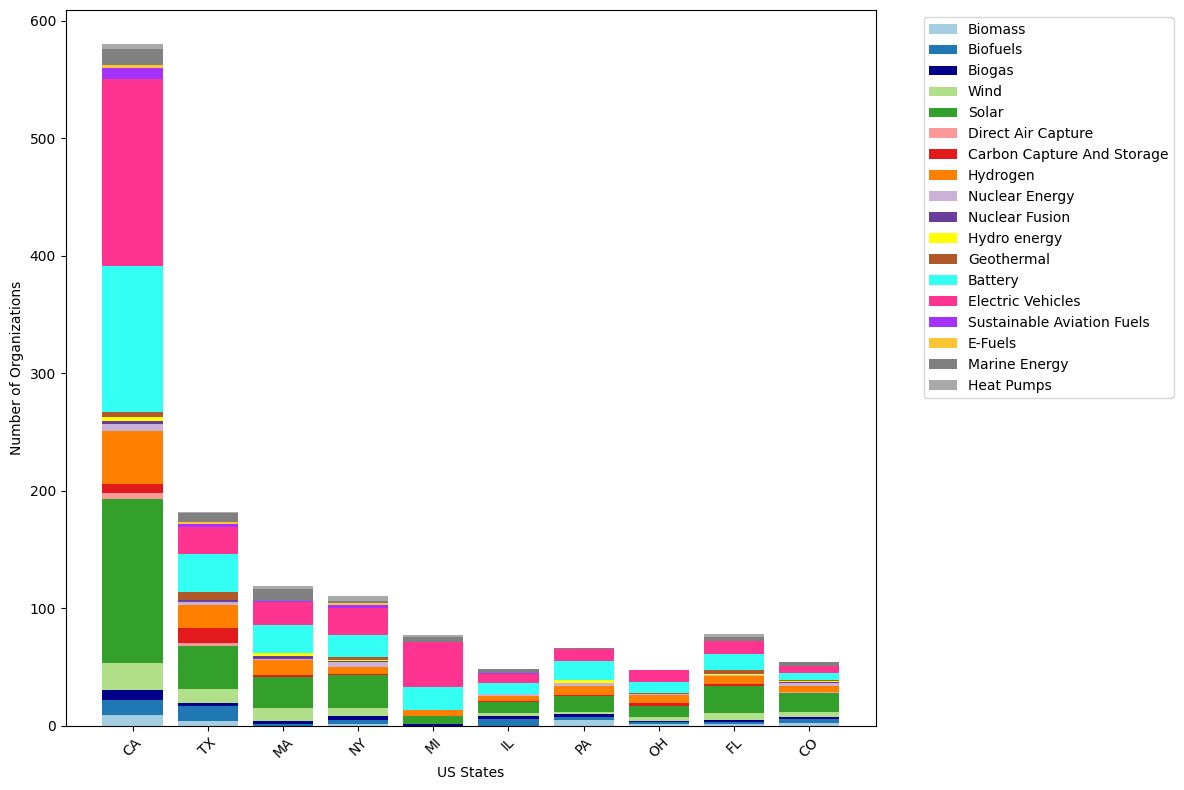

In [26]:
"""plot as stacked barchart"""

List_sectors =  ["Biomass", "Biofuels", "Biogas", "Wind", "Solar", "Direct Air Capture", "Carbon Capture And Storage", "Hydrogen", "Nuclear Energy", "Nuclear Fusion", "Hydro energy", "Geothermal", "Battery","Electric Vehicles", "Sustainable Aviation Fuels", "E-Fuels", "Marine Energy", "Heat Pumps"]


import matplotlib.pyplot as plt
import numpy as np

list_10_states = ordered_states["state"].head(10).to_list()

df_manu_US = df_manu_US[df_manu_US["state"].isin(list_10_states)]

number_of_orgs = []
sectors = []
states = []
for sector in List_sectors:
    for state in list_10_states:
        number_of_orgs.append(df_manu_US[(df_manu_US["state"]==state) & (df_manu_US["sector"].str.contains(sector, na=False))].shape[0])
        sectors.append(sector)
        states.append(state)

#create a dataframe
df_manu_US_sectors = pd.DataFrame({"state": states, "sector": sectors, "number_of_orgs": number_of_orgs})
print(df_manu_US_sectors)

color_codes = [
    '#a6cee3',  # Light Blue
    '#1f78b4',  # Medium Blue
    'darkblue',  # Dark Blue
    '#b2df8a',  # Light Green
    '#33a02c',  # Dark Green
    '#fb9a99',  # Pink
    '#e31a1c',  # Red
    #'#fdbf6f',  # Light Orange
    '#ff7f00',  # Orange
    '#cab2d6',  # Light Purple
    '#6a3d9a',  # Purple
    'yellow',  # Light Yellow
    '#b15928',   # Brown


    '#33FFF2',  # Turquoise

    '#FF3390',  # Hot Pink
    '#A533FF',  # Purple

    '#FFC433',  # Gold
    'gray',  # gray
    'darkgray',  # Adrkgray

]

# create a stacked barchart with the colors

# Pivot the dataframe so that rows = states and columns = sectors
df_pivot = df_manu_US_sectors.pivot(index="state", columns="sector", values="number_of_orgs")
df_pivot = df_pivot.fillna(0)

# Ensure the order of states is preserved as in list_10_states
df_pivot = df_pivot.loc[list_10_states]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(df_pivot))

for i, sector in enumerate(List_sectors):
    ax.bar(df_pivot.index, df_pivot[sector], bottom=bottom,
           label=sector, color=color_codes[i])
    bottom += df_pivot[sector].values  # update bottom for next stack

ax.set_xlabel("US States")
ax.set_ylabel("Number of Organizations")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("US_state_specialization.pdf")

/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/1794966611.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.text(i, 1.02, f'{int(ordered_states[ordered_states.state==state]["Linkedin_name"])}', ha='center', va='bottom', fontsize=10)


FileNotFoundError: [Errno 2] No such file or directory: 'Outputs/US_state_specialization_normalized.pdf'

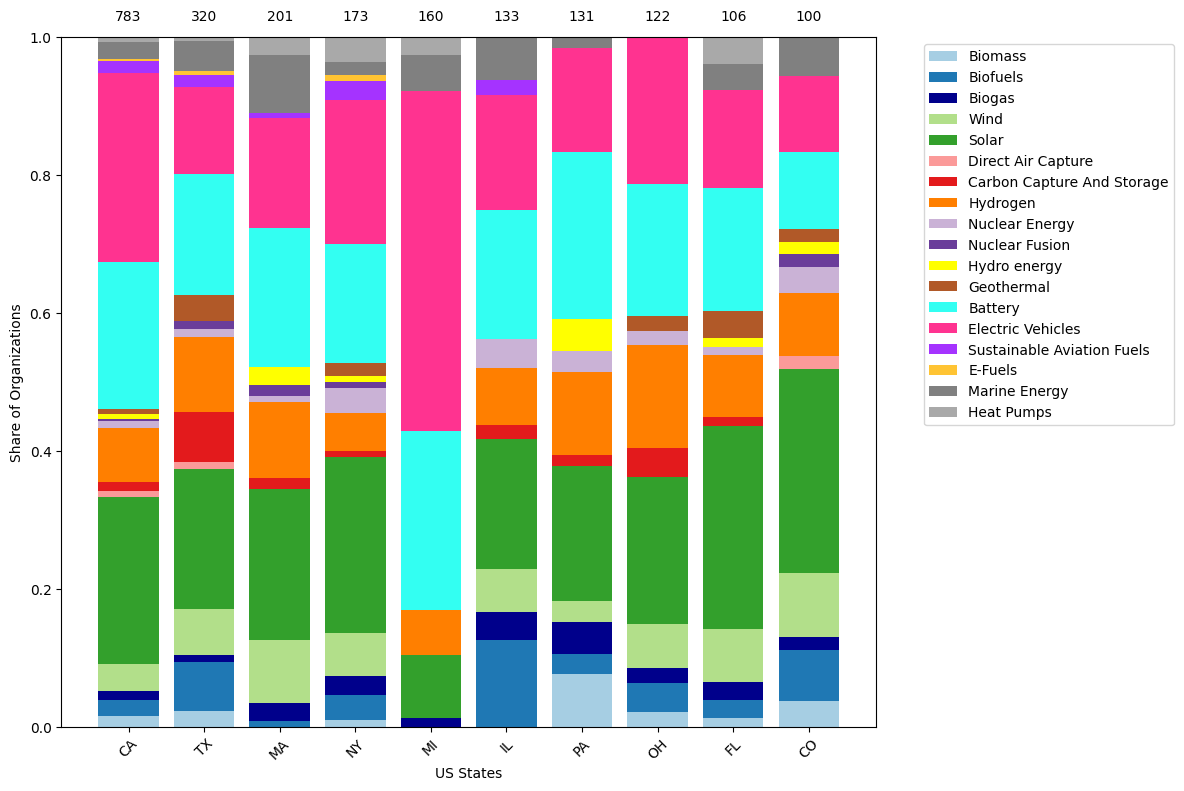

In [27]:
"""" Normalized to 100%"""
import matplotlib.pyplot as plt
import numpy as np

# Pivot the dataframe so that rows = states and columns = sectors
df_pivot = df_manu_US_sectors.pivot(index="state", columns="sector", values="number_of_orgs")
df_pivot = df_pivot.fillna(0)

# Ensure the order of states is preserved as in list_10_states
df_pivot = df_pivot.loc[list_10_states]

# Normalize so that each state's total sums to 1 (i.e., 100%)
df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Create the normalized stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(df_norm))

for i, sector in enumerate(List_sectors):
    ax.bar(df_norm.index, df_norm[sector], bottom=bottom,
           label=sector, color=color_codes[i])
    bottom += df_norm[sector].values  # update bottom for next stack

ax.set_xlabel("US States")
ax.set_ylabel("Share of Organizations")

# Add total counts as text on top of each bar
for i, state in enumerate(df_norm.index):
    ax.text(i, 1.02, f'{int(ordered_states[ordered_states.state==state]["Linkedin_name"])}', ha='center', va='bottom', fontsize=10)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("US_state_specialization_normalized.pdf")

In [28]:
# For the EU

df_orgs_EU = df2[df2["Linkedin_name"].isin(organizations_headquarter_EU)]
df_manu_EU = df_orgs_EU[df_orgs_EU["firm_type"].str.contains("Manufact", case=False, na=False)]
df_manu_EU["Country"] = df_manu_EU["Linkedin_name"].map(dict_organizations_headquarter_EU)
ordered_states = df_manu_EU[["Country","Linkedin_name"]].groupby("Country").count().sort_values(by="Linkedin_name", ascending=False).reset_index()

/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/3345736635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manu_EU["Country"] = df_manu_EU["Linkedin_name"].map(dict_organizations_headquarter_EU)


    Country      sector  number_of_orgs
0        DE     Biomass              25
1        FR     Biomass              47
2        NL     Biomass              28
3        ES     Biomass              25
4        IT     Biomass              31
..      ...         ...             ...
175      SE  Heat Pumps              15
176      BE  Heat Pumps              12
177      DK  Heat Pumps              21
178      AT  Heat Pumps              10
179      PL  Heat Pumps               9

[180 rows x 3 columns]


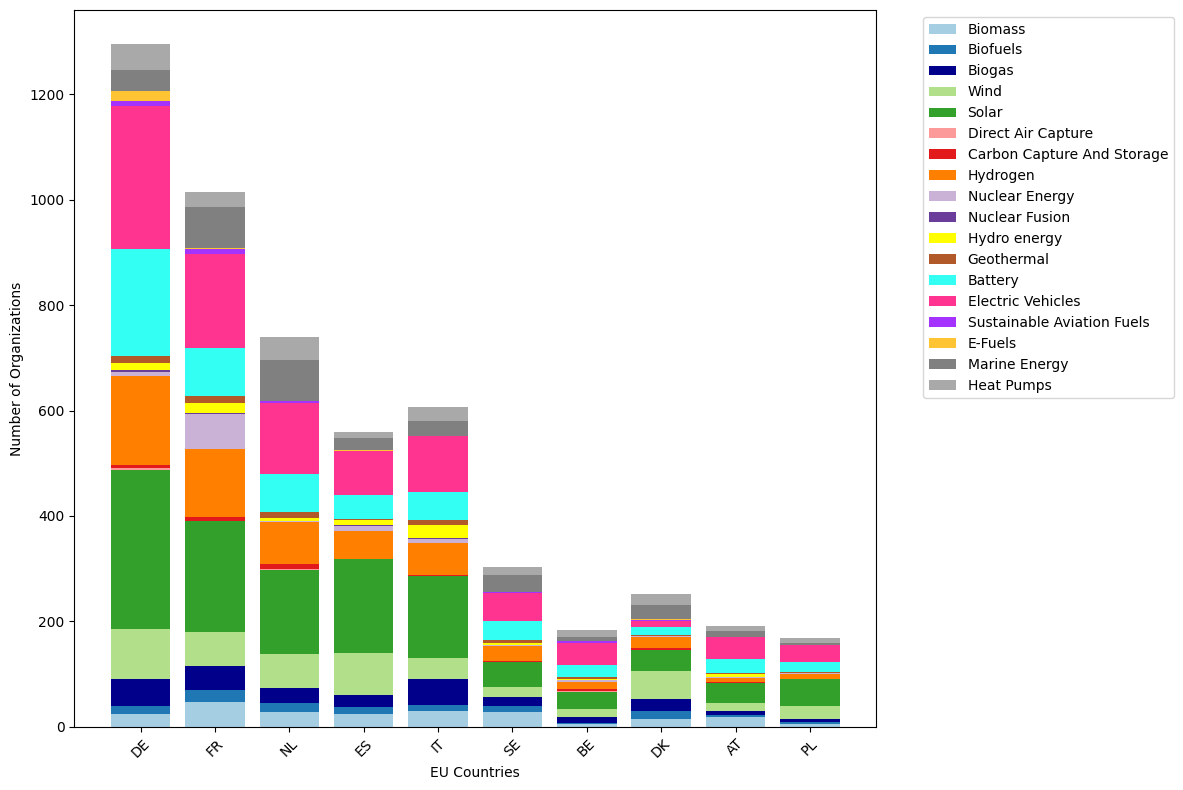

In [29]:
"""plot as stacked barchart"""

List_sectors =  ["Biomass", "Biofuels", "Biogas", "Wind", "Solar", "Direct Air Capture", "Carbon Capture And Storage", "Hydrogen", "Nuclear Energy", "Nuclear Fusion", "Hydro energy", "Geothermal", "Battery","Electric Vehicles", "Sustainable Aviation Fuels", "E-Fuels", "Marine Energy", "Heat Pumps"]


import matplotlib.pyplot as plt
import numpy as np

list_10_states = ordered_states["Country"].head(10).to_list()

df_manu_EU = df_manu_EU[df_manu_EU["Country"].isin(list_10_states)]

number_of_orgs = []
sectors = []
states = []
for sector in List_sectors:
    for state in list_10_states:
        number_of_orgs.append(df_manu_EU[(df_manu_EU["Country"]==state) & (df_manu_EU["sector"].str.contains(sector, na=False))].shape[0])
        sectors.append(sector)
        states.append(state)

#create a dataframe
df_manu_EU_sectors = pd.DataFrame({"Country": states, "sector": sectors, "number_of_orgs": number_of_orgs})
print(df_manu_EU_sectors)

color_codes = [
    '#a6cee3',  # Light Blue
    '#1f78b4',  # Medium Blue
    'darkblue',  # Dark Blue
    '#b2df8a',  # Light Green
    '#33a02c',  # Dark Green
    '#fb9a99',  # Pink
    '#e31a1c',  # Red
    #'#fdbf6f',  # Light Orange
    '#ff7f00',  # Orange
    '#cab2d6',  # Light Purple
    '#6a3d9a',  # Purple
    'yellow',  # Light Yellow
    '#b15928',   # Brown


    '#33FFF2',  # Turquoise

    '#FF3390',  # Hot Pink
    '#A533FF',  # Purple

    '#FFC433',  # Gold
    'gray',  # gray
    'darkgray',  # Adrkgray

]

# create a stacked barchart with the colors

# Pivot the dataframe so that rows = states and columns = sectors
df_pivot = df_manu_EU_sectors.pivot(index="Country", columns="sector", values="number_of_orgs")
df_pivot = df_pivot.fillna(0)

# Ensure the order of states is preserved as in list_10_states
df_pivot = df_pivot.loc[list_10_states]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(df_pivot))

for i, sector in enumerate(List_sectors):
    ax.bar(df_pivot.index, df_pivot[sector], bottom=bottom,
           label=sector, color=color_codes[i])
    bottom += df_pivot[sector].values  # update bottom for next stack

ax.set_xlabel("EU Countries")
ax.set_ylabel("Number of Organizations")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("EU_state_specialization.pdf")


/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_10633/3844950831.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.text(i, 1.02, f'{int(ordered_states[ordered_states.Country == state]["Linkedin_name"])}', ha='center', va='bottom',


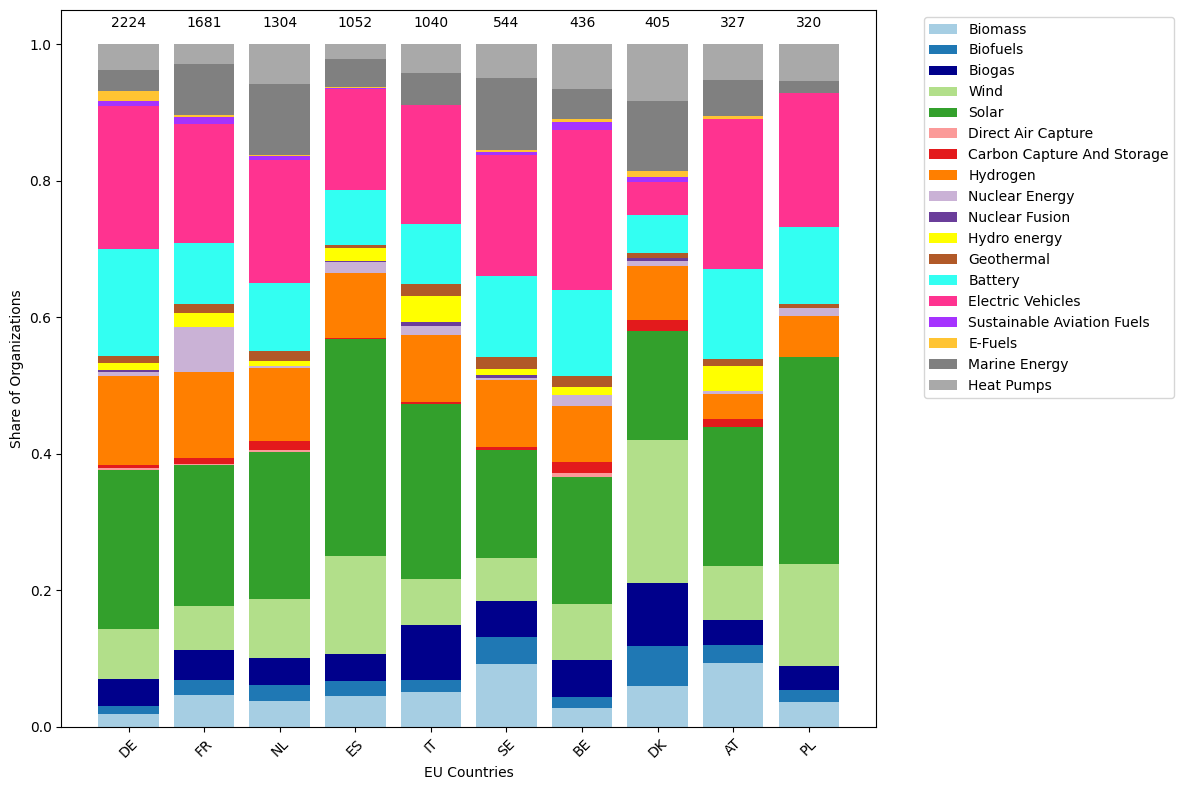

In [30]:
"""" Normalized to 100%"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pivot the dataframe so that rows = states and columns = sectors
df_pivot = df_manu_EU_sectors.pivot(index="Country", columns="sector", values="number_of_orgs")
df_pivot = df_pivot.fillna(0)

# Ensure the order of states is preserved as in list_10_states
df_pivot = df_pivot.loc[list_10_states]

# Normalize so that each state's total sums to 1 (i.e., 100%)
df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Create the normalized stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(df_norm))

for i, sector in enumerate(List_sectors):
    ax.bar(df_norm.index, df_norm[sector], bottom=bottom,
           label=sector, color=color_codes[i])
    bottom += df_norm[sector].values  # update bottom for next stack

ax.set_xlabel("EU Countries")
ax.set_ylabel("Share of Organizations")

# Add total counts as text on top of each bar
for i, state in enumerate(df_norm.index):
    ax.text(i, 1.02, f'{int(ordered_states[ordered_states.Country == state]["Linkedin_name"])}', ha='center', va='bottom',
            fontsize=10)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("EU_state_specialization_normalized.pdf")